In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MINI PROJECT/DATASET/train.csv',delimiter='\t')
df.head()

,PID,Text_data,Label
0,train_pid_1,Waiting for my mind to have a breakdown once t...,moderate
1,train_pid_2,My new years resolution : I'm gonna get my ass...,moderate
2,train_pid_3,New year : Somone else Feeling like 2020 will ...,moderate
3,train_pid_4,"My story I guess : Hi, Im from Germany and my ...",moderate
4,train_pid_5,Sat in the dark and cried myself going into th...,moderate


In [ ]:
# Define the label mapping
label_mapping = {'not depression': 0, 'moderate': 1, 'severe': 2}

# Apply the mapping to the 'Label' column
df['Label'] = df['Label'].map(label_mapping)

# Verify the changes
print(df.tail())
print(df.dtypes)

                 PID                                          Text_data  Label
8886  train_pid_8887  Ways to reverse memory loss from depression? :...      2
8887  train_pid_8888  A Comprehensive Guide To Slowly Getting Better...      2
8888  train_pid_8889  I don’t think college is right for me : TW: su...      2
8889  train_pid_8890  Please help: Severe insomnia affecting me in m...      2
8890  train_pid_8891  With each passing day my depression is getting...      2
PID          object
Text_data    object
Label         int64
dtype: object


PID          0
Text_data    0
Label        0
dtype: int64
Label
1    6019
0    1971
2     901
Name: count, dtype: int64


c:\Users\sreevishak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sreevishak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sreevishak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


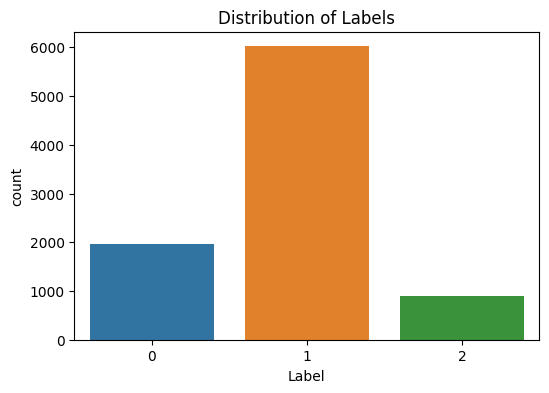

                                           Text_data  \
0  Waiting for my mind to have a breakdown once t...   
1  My new years resolution : I'm gonna get my ass...   
2  New year : Somone else Feeling like 2020 will ...   
3  My story I guess : Hi, Im from Germany and my ...   
4  Sat in the dark and cried myself going into th...   

                                      Processed_Text  
0  waiting for my mind to have a breakdown once t...  
1  my new years resolution im gonna get my ass in...  
2  new year somone else feeling like will be ther...  
3  my story i guess hi im from germany and my eng...  
4  sat in the dark and cried myself going into th...  


In [ ]:

# Check for missing values
print(df.isnull().sum())

print(df['Label'].value_counts())


# Distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Label')
plt.title('Distribution of Labels')
plt.show()

# Example of text preprocessing
import re
import string

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Processed_Text'] = df['Text_data'].apply(preprocess_text)
daf=df['Processed_Text']

# Display the processed text
print(df[['Text_data', 'Processed_Text']].head())



In [ ]:

# Check class distribution
print(df['Label'].value_counts())

# Extract features and labels
X = df['Processed_Text']
y = df['Label']

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_tfidf, y)

# Convert TF-IDF features back to text data
X_res_text = vectorizer.inverse_transform(X_res)
df_resampled = pd.DataFrame({'PID': range(len(y_res)), 'Text data': [' '.join(text) for text in X_res_text], 'Label': y_res})

# Convert the 'Label' column to integers
df_resampled['Label'] = df_resampled['Label'].astype(int)

print(df_resampled['Label'].value_counts())


print(df_resampled.head())


df_resampled.to_csv('augmented_dataset1.csv', index=False)

Label
1    6019
0    1971
2     901
Name: count, dtype: int64
Label
1    6019
0    6019
2    6019
Name: count, dtype: int64
   PID                                          Text data  Label
0    0  waiting for my mind to have breakdown once the...      1
1    1  for my new anymore little bit not of just and ...      1
2    2  new year feeling there else depressed last eve...      1
3    3  for my to have the new feeling know about anyo...      1
4    4  to the new year in start and into great myself...      1


In [ ]:
daf=df_resampled[['Text data','Label']]
daf.head()

,Text data,Label
0,waiting for my mind to have breakdown once the...,1
1,for my new anymore little bit not of just and ...,1
2,new year feeling there else depressed last eve...,1
3,for my to have the new feeling know about anyo...,1
4,to the new year in start and into great myself...,1


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(daf['Text data'], daf['Label'], test_size=0.2, random_state=42)

TF-IDF VECTORIZATION


In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

COUNTVECT

In [ ]:
# Count Vectorization
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [ ]:
# Train Logistic Regression Models
log_reg_tfidf = LogisticRegression()
log_reg_count = LogisticRegression()


log_reg_tfidf.fit(X_train_tfidf, y_train)
log_reg_count.fit(X_train_count, y_train)



LogisticRegression()

In [ ]:
# Make Predictions and Evaluate
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)
y_pred_count = log_reg_count.predict(X_test_count)


accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
accuracy_count = accuracy_score(y_test, y_pred_count)

report_tfidf = classification_report(y_test, y_pred_tfidf)
report_count = classification_report(y_test, y_pred_count)

print(f'TF-IDF Accuracy: {accuracy_tfidf}')
print('TF-IDF Classification Report:')
print(report_tfidf)

print(f'Count Vectorization Accuracy: {accuracy_count}')
print('Count Vectorization Classification Report:')
print(report_count)


TF-IDF Accuracy: 0.9440753045404208
TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1245
           1       0.90      0.95      0.92      1196
           2       0.98      0.97      0.98      1171

    accuracy                           0.94      3612
   macro avg       0.95      0.94      0.94      3612
weighted avg       0.95      0.94      0.94      3612

Count Vectorization Accuracy: 0.9476744186046512
Count Vectorization Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1245
           1       0.93      0.93      0.93      1196
           2       0.97      0.97      0.97      1171

    accuracy                           0.95      3612
   macro avg       0.95      0.95      0.95      3612
weighted avg       0.95      0.95      0.95      3612

